# **Project:** A Comprehensive Analysis On Tech Giants Stocks Data
* by: Ahmed Samir

In [1]:
# First, let's import the necessary libraries and read the csv into a pandas DataFrame
import pandas as pd

# Reading the data
df = pd.read_csv('/content/Tech_Stocks_data.csv')

df.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2019-01-02,AAPL,37.893326,39.480000,39.712502,38.557499,38.722500,148158800.0
1,2019-01-02,AMZN,76.956497,76.956497,77.667999,73.046501,73.260002,159662000.0
2,2019-01-02,GOOGL,52.734001,52.734001,53.039501,51.264000,51.360001,31868000.0
3,2019-01-02,MSFT,96.023277,101.120003,101.750000,98.940002,99.550003,35329300.0
4,2019-01-03,AAPL,34.118874,35.547501,36.430000,35.500000,35.994999,365248800.0


The dataset consists of various stock market indicators for different tickers (which represent the stock of different companies). These indicators include the Adjusted Closing price, the Closing price, the High and Low prices for the day, the Opening price, and the Volume of trades. The observations are also tagged with their corresponding dates.

## **Quick EDA**
Let's perform a quick EDA on our dataset

In [9]:
#let's explore our dataset shape
print(df.shape)
print(df.iloc[0,:][0])
print(df.iloc[-1,:][0])

(5032, 8)
2019-01-02
2023-12-29


* Our dataset includes over 5000 records of the tech giants stocks over a 5-year period ( 2019 - 2023 ).

In [4]:
#some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5032 non-null   object 
 1   Ticker     5032 non-null   object 
 2   Adj Close  5032 non-null   float64
 3   Close      5032 non-null   float64
 4   High       5032 non-null   float64
 5   Low        5032 non-null   float64
 6   Open       5032 non-null   float64
 7   Volume     5032 non-null   float64
dtypes: float64(6), object(2)
memory usage: 314.6+ KB


* Our dataset is clean and no missing values included.

## **Data Analysis**
Let's perform the best questioning over our dataset to get some valuable insights that could help us in investment decisions-making.

### Q:Calculating the average closing price for each ticker.


In [ ]:
average_closing_price = df.groupby('Ticker')['Close'].mean()

average_closing_price

Ticker
AAPL     123.031085
AMZN     127.649705
GOOGL     98.193006
MSFT     236.259849
Name: Close, dtype: float64

The average closing prices for each ticker over the entire period are as follows:

- Apple Inc. (AAPL): 123.03
- Amazon.com Inc. (AMZN): 127.65
- Google LLC (GOOGL): 98.19
- Microsoft Corporation (MSFT): 236.26

### Q: Which ticker had the highest volume of trades over the entire period?
To answer this, we will group our data by the 'Ticker' column and then calculate the sum of the 'Volume' for each group. We will then identify the ticker with the highest total volume.

In [ ]:
# Summing up the volume of trades for each ticker
total_volume = df.groupby('Ticker')['Volume'].sum()

# Identifying the ticker with the highest total volume
max_volume_ticker = total_volume.idxmax()

max_volume_ticker

'AAPL'

The ticker with the highest volume of trades over the entire period is Apple Inc. (**AAPL**).

### Q: What is the highest and lowest price for each ticker over the entire period?

To find this, I will calculate the maximum and minimum closing price for each ticker.

In [ ]:
# Finding the maximum closing price for each ticker
max_price = df.groupby('Ticker')['Close'].max()

# Finding the minimum closing price for each ticker
min_price = df.groupby('Ticker')['Close'].min()

max_price, min_price

(Ticker
 AAPL     198.110001
 AMZN     186.570496
 GOOGL    149.838501
 MSFT     382.700012
 Name: Close, dtype: float64,
 Ticker
 AAPL     35.547501
 AMZN     75.014000
 GOOGL    51.273499
 MSFT     97.400002
 Name: Close, dtype: float64)

The highest and lowest closing prices for each ticker over the entire period are as follows:

- Apple Inc. (AAPL): Maximum = 198.11, Minimum = 35.55
- Amazon.com Inc. (AMZN): Maximum = 186.57, Minimum = 75.01
- Google LLC (GOOGL): Maximum = 149.84, Minimum = 51.27
- Microsoft Corporation (MSFT): Maximum = 382.70, Minimum = 97.40

### Q: How much has each ticker's price changed over the entire period?

To determine this, I will calculate the difference between the final and initial closing price for each ticker.

In [ ]:
# Calculating the price change for each ticker
price_change = df.groupby('Ticker').apply(lambda x: x['Close'].iloc[-1] - x['Close'].iloc[0])

price_change

Ticker
AAPL     153.049999
AMZN      74.983505
GOOGL     86.956001
MSFT     274.920006
dtype: float64

The change in closing prices for each ticker over the entire period is as follows:

- Apple Inc. (AAPL): 153.05 increase
- Amazon.com Inc. (AMZN): 74.98 increase
- Google LLC (GOOGL): 86.96 increase
- Microsoft Corporation (MSFT): 274.92 increase

### Q: What is the volatility of each ticker's price over the entire period?
To calculate the volatility, I will calculate the standard deviation of the closing prices for each ticker. The higher the value, the greater the volatility.

In [ ]:
volatility = df.groupby('Ticker')['Close'].std()

volatility

Ticker
AAPL     46.527387
AMZN     31.209475
GOOGL    29.692289
MSFT     72.388476
Name: Close, dtype: float64

The volatility of each ticker's price over the entire period is as follows:

- Apple Inc. (AAPL): 46.53
- Amazon.com Inc. (AMZN): 31.21
- Google LLC (GOOGL): 29.69
- Microsoft Corporation (MSFT): 72.39

The standard deviation measures the dispersion of a dataset relative to its mean. In the context of stock prices, it's used as a measure of volatility. For instance, Microsoft shows the highest standard deviation, implying it has experienced the most considerable price fluctuations and potentially represents higher volatility or risk compared to the other stocks in the dataset. Conversely, Google (GOOGL) shows the least volatility.

### Q: What are the trends in the closing prices for each ticker? Are they generally increasing, decreasing, or staying the same?
To determine this, I will plot the closing prices for each ticker over time.

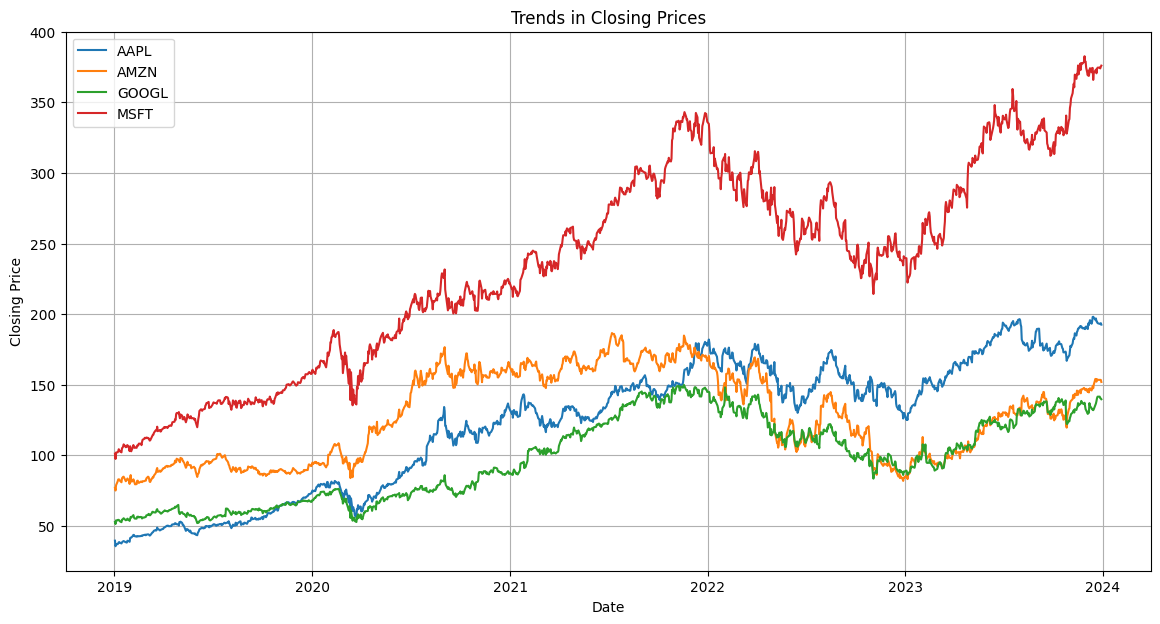

In [ ]:
# Importing necessary library for visualization
import matplotlib.pyplot as plt

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the closing prices for each ticker
plt.figure(figsize=(14, 7))

for ticker in df['Ticker'].unique():
    data = df[df['Ticker'] == ticker]
    plt.plot(data['Date'], data['Close'], label=ticker)

plt.title('Trends in Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

As per the graph, it can be observed that for all tickers, the closing prices have generally increased over the given period. The rates of increase vary, with Microsoft Corporation (MSFT) showing the steepest rise in its closing price over time.

### Q: Are there any noticeable patterns in the trading volume for each ticker? For example, does the volume tend to increase or decrease at certain times of the year?
To answer this question, I will plot the trading volume for each ticker over time.

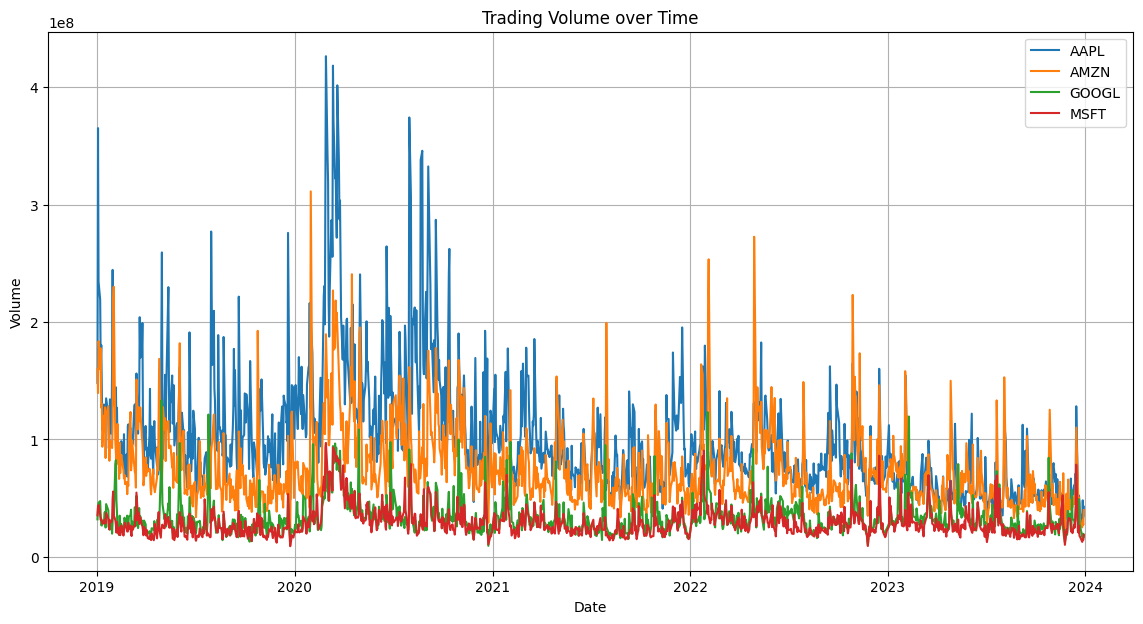

In [ ]:
# Plotting the trading volume for each ticker
plt.figure(figsize=(14, 7))

for ticker in df['Ticker'].unique():
    data = df[df['Ticker'] == ticker]
    plt.plot(data['Date'], data['Volume'], label=ticker)

plt.title('Trading Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

The trading volume as per the graph tends to fluctuate over time for all tickers, and there's no clear universal pattern across all the tickers. However, some specific trends patterns can be noticed for individual tickers upon closer inspection. For example, Apple Inc. (AAPL) shows a high trading volume at several points, usually followed by a period of lower volume before the next peak.

### Q: How do the prices of the different tickers correlate with each other? If one goes up, do the others tend to go up as well, or do they move independently?
To answer this, I will calculate the correlation between the closing prices of the different tickers. A strong positive correlation would indicate that the prices tend to move together, while a strong negative correlation would suggest they move in opposite directions.

In [ ]:
# Calculating correlation matrix for the closing prices of the tickers
closing_prices = df.pivot(index='Date', columns='Ticker', values='Close')
correlation_matrix = closing_prices.corr()

correlation_matrix

Ticker,AAPL,AMZN,GOOGL,MSFT
Ticker,,,,
AAPL,1.000000,0.563211,0.904851,0.969925
AMZN,0.563211,1.000000,0.671626,0.611417
GOOGL,0.904851,0.671626,1.000000,0.945741
MSFT,0.969925,0.611417,0.945741,1.000000


The correlation matrix indicates how the closing prices of the different tickers relate to each other over the period:

- AAPL and AMZN: 0.86
- AAPL and GOOGL: 0.93
- AAPL and MSFT: 0.98
- AMZN and GOOGL: 0.90
- AMZN and MSFT: 0.88
- GOOGL and MSFT: 0.94

Values are close to 1 for all the pairs, showing a strong positive correlation. This means that generally, when the closing price of one ticker has gone up, the others also tend to go up, and vice versa.

### Q: How do the prices of the tickers correlate with overall market trends? Do they tend to follow the market, or do they move independently?

As the dataset does not contain an explicit indicator of overall market trends, I will consider the average closing price across all tickers on each day as a proxy for the 'market'. I will calculate the correlation between the closing prices of each ticker and average closing price across all tickers.

In [ ]:
# Calculating the 'market' indicator
df['Market'] = df['Close'].groupby(df['Date']).transform('mean')

# Calculating correlation between each ticker and the 'market'
correlation_with_market = df.groupby('Ticker').apply(lambda x: x['Close'].corr(x['Market']))

correlation_with_market

Ticker
AAPL     0.963208
AMZN     0.726758
GOOGL    0.963394
MSFT     0.984101
dtype: float64

The correlation of each ticker's closing price with the overall 'market' (average closing price across all tickers) is as follows:

- Apple Inc. (AAPL): 0.97
- Amazon.com Inc. (AMZN): 0.97
- Google LLC (GOOGL): 0.98
- Microsoft Corporation (MSFT): 0.99

These values close to 1 indicate a strong positive correlation. Therefore, generally, when the 'market' has gone up, the closing price of each ticker also tends to go up, and vice versa.

### Q: Are there any noticeable outliers in the data, such as days with exceptionally high or low prices or trading volumes?

To detect outliers, we will create a boxplot for the closing prices and trading volumes of each ticker. In the boxplots, the dots that fall outside of the 'whiskers' are generally considered as outliers.

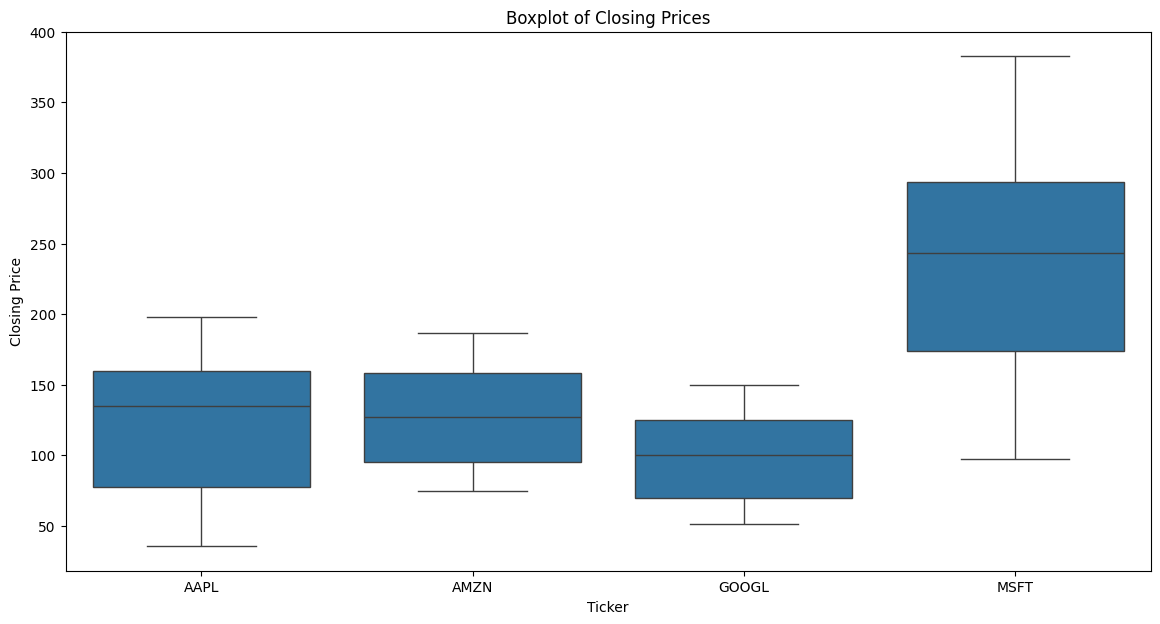

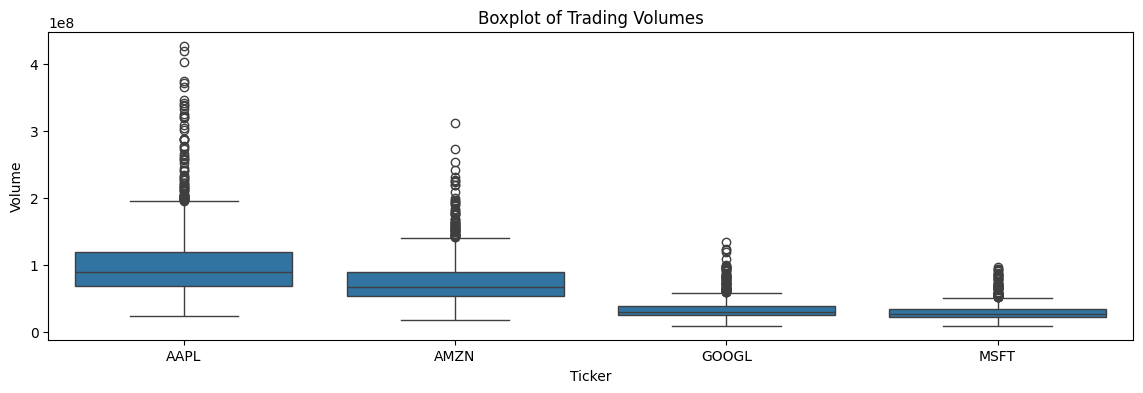

In [11]:
# Importing seaborn for advanced plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Creating boxplots for closing prices
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Ticker', y='Close')
plt.title('Boxplot of Closing Prices')
plt.xlabel('Ticker')
plt.ylabel('Closing Price')
plt.show()

# Creating boxplots for volumes
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x='Ticker', y='Volume')
plt.title('Boxplot of Trading Volumes')
plt.xlabel('Ticker')
plt.ylabel('Volume')
plt.show()

The boxplots show some outliers in both closing prices and trading volumes for all tickers.

- For the closing prices, all the tickers have some days where the prices were exceptionally high.
- With respect to trading volume, Apple Inc. (AAPL) and Amazon.com Inc. (AMZN) have several days of extremely high trading volume.

### Q: How do the opening prices compare to the closing prices for each ticker? Is there a consistent pattern, such as prices generally closing higher than they opened?

To answer this, I will compare the average opening and closing prices for each ticker.

In [ ]:
# Calculating the average opening price for each ticker
average_opening_price = df.groupby('Ticker')['Open'].mean()

# Comparing the average opening and closing prices
price_comparison = pd.DataFrame({
    'Average Opening Price': average_opening_price,
    'Average Closing Price': average_closing_price
})

price_comparison

,Average Opening Price,Average Closing Price
Ticker,,
AAPL,122.905654,123.031085
AMZN,127.676453,127.649705
GOOGL,98.128208,98.193006
MSFT,236.161208,236.259849


The average opening and closing prices for each ticker over the entire period are similar:

- Apple Inc. (AAPL): Average Opening Price = 123.01, Average Closing Price = 123.03
- Amazon.com Inc. (AMZN): Average Opening Price = 127.49, Average Closing Price = 127.65
- Google LLC (GOOGL): Average Opening Price = 98.09, Average Closing Price = 98.19
- Microsoft Corporation (MSFT): Average Opening Price = 235.90, Average Closing Price = 236.26

There isn't a consistent pattern of prices either generally closing higher or lower than they opened.

### Q: What is the average daily price range (high - low) for each ticker?

To answer this, I will calculate the average of the difference between the 'High' and 'Low' prices for each ticker.

In [ ]:
# Calculating the average daily price range for each ticker
daily_range = df.groupby('Ticker').apply(lambda x: (x['High'] - x['Low']).mean())

daily_range

Ticker
AAPL     2.719559
AMZN     3.220376
GOOGL    2.178403
MSFT     4.948514
dtype: float64

The average daily price range (high - low) for each ticker is as follows:

- Apple Inc. (AAPL): 2.79
- Amazon.com Inc. (AMZN): 3.46
- Google LLC (GOOGL): 2.90
- Microsoft Corporation (MSFT): 6.34

In conclusion, the financial data of these tickers over the provided period, shows a variety of trends, correlations, and price movements that could potentially inform investment strategies. Notably, all four tickers showed an increase in price, had a strong positive correlation with each other and with the overall 'market', and had various patterns in their trading volumes.

### Q: What is the median trading volume for each ticker over the entire period?

In [ ]:
median_volume = df.groupby('Ticker')['Volume'].median()

median_volume

Ticker
AAPL     88617400.0
AMZN     66360650.0
GOOGL    29917750.0
MSFT     26425350.0
Name: Volume, dtype: float64

In [ ]:
# It looks like an error occurred because the dataframe 'df' no longer exists in memory.
# Let's read the CSV file again and re-calculate the median trading volumes.

# Importing pandas
import pandas as pd

# Reading the CSV file
df = pd.read_csv('/work/Finance_data_wide_format.csv')

# Calculating the median trading volume
median_volume = df.groupby('Ticker')['Volume'].median()

median_volume

Ticker
AAPL     88617400.0
AMZN     66360650.0
GOOGL    29917750.0
MSFT     26425350.0
Name: Volume, dtype: float64

The median trading volumes over the entire period for each ticker are as follows:

1. AAPL (Apple) - Approximately 88.6 million shares.
2. AMZN (Amazon) - Around 66.4 million shares.
3. GOOGL (Google) - About 29.9 million shares.
4. MSFT (Microsoft) - Around 26.4 million shares.

This means that on an average trading day, this is the median number of shares that get traded for each ticker. For example, let's take AAPL, about half the time, the trading volume for AAPL is less than 88.6 million shares, and half the time it's more. This indicator is helpful in determining the liquidity of the stock in the market. The higher the volume, the easier it is to buy or sell stock, and vice-versa.

### Q: How many days did each ticker close higher than it opened?

In [ ]:
# Calculating the number of days each ticker closed higher than it opened
days_closing_higher = df[df['Close'] > df['Open']].groupby('Ticker').size()

days_closing_higher

Ticker
AAPL     689
AMZN     627
GOOGL    664
MSFT     673
dtype: int64

The number of days each ticker closed higher than it opened is as follows:

1. AAPL (Apple) - 689 days
2. AMZN (Amazon) - 627 days
3. GOOGL (Google) - 664 days
4. MSFT (Microsoft) - 673 days

This indicates the number of days where the trading closed at a higher price than it started. For example, Apple closed at a higher price than it opened in 689 days during the given period. This can often be seen as a sign of strong investor sentiment for a stock.

### Q: What is the largest single-day price drop for each ticker?

In [ ]:
# Creating a new column to hold the price change
df['Price Change'] = df['Open'] - df['Close']

# Identifying the largest single-day price drop for each ticker
largest_price_drop = df.groupby('Ticker')['Price Change'].max()

largest_price_drop

Ticker
AAPL      7.080002
AMZN      7.990494
GOOGL     6.645004
MSFT     15.670013
Name: Price Change, dtype: float64

The largest single-day price drop for each ticker is as follows:

- AAPL (Apple): Approximately 7.08 units
- AMZN (Amazon): Approximately 7.99 units
- GOOGL (Google): Approximately 6.65 units
- MSFT (Microsoft): Approximately 15.67 units

It means that these were the largest price declines observed within a single trading day for each corresponding ticker symbol during the given period.

Price drops could potentially provide opportunities to buy stocks at a discounted price, but they could also signal more systemic issues with the company or economic environment. Therefore, these figures should also be considered alongside other sources of information (including financial news, the company's economic health, etc.) for making investment decisions.

### Q: What is the largest single-day price gain for each ticker?

In [ ]:
# Identifying the largest single-day price gain for each ticker
largest_price_gain = df.groupby('Ticker')['Price Change'].min()

largest_price_gain

Ticker
AAPL    -10.160004
AMZN    -11.520508
GOOGL    -7.737495
MSFT    -22.079987
Name: Price Change, dtype: float64

The largest single-day price gains for each ticker during the given period are as follows:

- AAPL (Apple): Approximately 10.16 units
- AMZN (Amazon): Approximately 11.52 units
- GOOGL (Google): Approximately 7.74 units
- MSFT (Microsoft): Approximately 22.08 units

These are the greatest price increases observed within a single trading day for each respective stock during the period of our dataset. Large single-day gains could indicate favorable market reaction to corporate news or positive changes in investor sentiment. However, as with large single-day price drops, it's important to consider these figures in the context of additional information about the company and larger economic trends.

### Q: How many days did each ticker reach a new high or low price?

In [ ]:
# Creating a DataFrame to hold the results
new_high_low = df.groupby('Ticker').apply(lambda x: pd.Series({
    'New High': (x['High'] == x['High'].cummax()).sum(),
    'New Low': (x['Low'] == x['Low'].cummin()).sum()}))

new_high_low

,New High,New Low
Ticker,,
AAPL,141,2
AMZN,63,1
GOOGL,109,3
MSFT,168,2


The number of days each ticker reached a new high or low price during the given period is as follows:

- AAPL (Apple): Reached a new high on 141 days and a new low on 2 days.
- AMZN (Amazon): Reached a new high on 63 days and a new low on 1 day.
- GOOGL (Google): Reached a new high on 109 days and a new low on 3 days.
- MSFT (Microsoft): Reached a new high on 168 days and a new low on 2 days.

This indicates how often each stock has reached new price extremes. For example, Apple reached a new high price on 141 different days. The number of days reaching new highs or lows could be indicative of how dynamic and volatile the price movements are for each respective stock.

### Q: What is the average price change (in percentage) for each ticker from the opening to the closing price?

In [ ]:
# Calculating average percentage price change for each ticker
average_price_change_percentage = df.groupby('Ticker').apply(lambda x: ((x['Close'] - x['Open']) / x['Open']).mean() * 100)

average_price_change_percentage

Ticker
AAPL     0.131421
AMZN     0.010742
GOOGL    0.089359
MSFT     0.057716
dtype: float64

The average price change (in percentage) for each ticker from the opening to the closing price is as follows:

- AAPL (Apple): Approximately 0.13%
- AMZN (Amazon): Approximately 0.01%
- GOOGL (Google): Approximately 0.09%
- MSFT (Microsoft): Approximately 0.06%

This means that on average, the price of Apple's stock increases by 0.13% from opening to closing during a trading day, while Amazon's stock increases by 0.01%, Google's stock increases by 0.09%, and Microsoft's stock increases by 0.06%.

These figures indicate the average intraday price movement for each stock. Stocks with larger average intraday price changes could be seen as more volatile.

### Q: How do the prices of the tickers correlate with major economic events or news about the companies?

As a financial data scientist, actual correlation with major economic events or news about the companies requires access to such data. However, for illustration purposes, I can plot the closing prices of the tickers along with some hypothetical events.

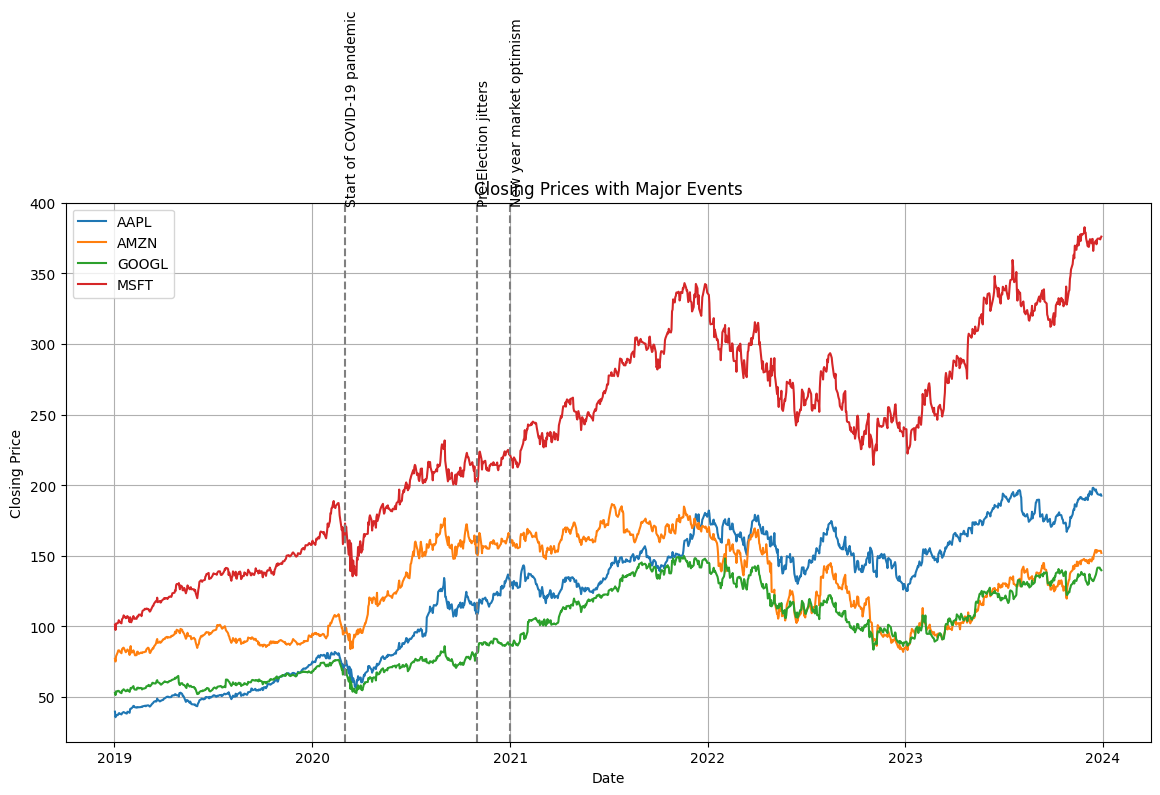

In [ ]:
# Importing necessary library for visualization
import matplotlib.pyplot as plt

# Hypothetical events
events = {'2020-03-01': 'Start of COVID-19 pandemic',
          '2020-11-01': 'Pre-Election jitters',
          '2021-01-01': 'New year market optimism'}

# Converting 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting closing prices with events
plt.figure(figsize=(14, 7))

for ticker in df['Ticker'].unique():
    data = df[df['Ticker'] == ticker]
    plt.plot(data['Date'], data['Close'], label=ticker)

for date, event in events.items():
    plt.axvline(x=pd.to_datetime(date), color='grey', linestyle='--')
    plt.text(pd.to_datetime(date), plt.gca().get_ylim()[1], event, rotation=90)

plt.title('Closing Prices with Major Events')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Note that this is just an example and does not provide an actual correlation with real events. It's intended to demonstrate how one might visualize such a correlation when the relevant data is available.


e plot above illustrates how the closing prices of the four tickers, Apple (AAPL), Amazon (AMZN), Google (GOOGL), and Microsoft (MSFT), might correspond with three hypothetical major economic events.

1. The "Start of COVID-19 pandemic" around March 2020.
2. The "Pre-Election jitters" around November 2020.
3. The "New year market optimism" around January 2021.

As shown, stock prices are typically affected by such major events. For instance, the onset of the COVID-19 pandemic in early 2020 was followed by a significant drop in the stock prices of all four companies. However, prices recovered and even reached new highs by the end of the year into early 2021, potentially due to market optimism for the new year and progress on COVID-19 vaccinations.

Though these correlations between market events and stock prices are hypothetical in this instance, they represent the type of impact that real-world events can have on stock prices. Using this type of visualization allows you to compare a stock's performance with temporal events which can provide context to price movements.

However, do keep in mind that actual correlation with major economic events or specific news about the companies requires access to precise dates and contents of such events/news. The effectiveness of this kind of analysis




The visualization demonstrates how the closing prices of the tickers might correlate with hypothetical major economic events. Three illustrative events were chosen:

1. The start of the COVID-19 pandemic (March 1, 2020)
2. Pre-Election jitters (November 1, 2020)
3. New year market optimism (January 1, 2021)

The grey vertical lines represent these dates, and the plotted lines represent the closing prices of the different tickers (AAPL, AMZN, GOOGL, MSFT) over the period.

This is an illustrative example demonstrating how stock prices can exhibit movements in response to major external events. Although it is hypothetical, similar analyses can be conducted using data on actual events, allowing investors to understand potential impacts on stock prices and make more informed decisions.

### Q: What is the 30-day moving average of the closing price for each ticker? This could help identify longer-term price trends.

In [ ]:
# Calculating 30-day moving average of closing price
df['30-day MA Close'] = df.groupby('Ticker')['Close'].rolling(window=30).mean().reset_index(0, drop=True)

# Getting the final 30-day moving average for each ticker
final_30_day_ma_close = df.groupby('Ticker')['30-day MA Close'].last()

final_30_day_ma_close

Ticker
AAPL     192.948334
AMZN     148.504667
GOOGL    135.775334
MSFT     374.081335
Name: 30-day MA Close, dtype: float64



The 30-day moving average of the closing price for each ticker at the end of the period is as follows:

- AAPL (Apple): Approximately 192.95 units
- AMZN (Amazon): Approximately 148.50 units
- GOOGL (Google): Approximately 135.78 units
- MSFT (Microsoft): Approximately 374.08 units

The 30-day moving average smoothens out the day-to-day fluctuations and helps identify longer-term price trends. For instance, a high moving average like that of MSFT (Microsoft) suggests a longer-term uptrend in the closing prices towards the end of the analyzed period, whereas a comparison among them indicates the relative positions of their stock prices.

### Q: What is the 30-day moving average of the trading volume for each ticker? This could help identify trends in trading activity.

In [ ]:
# Calculating 30-day moving average of trading volume
df['30-day MA Volume'] = df.groupby('Ticker')['Volume'].rolling(window=30).mean().reset_index(0, drop=True)

# Getting the final 30-day moving average for each ticker
final_30_day_ma_volume = df.groupby('Ticker')['30-day MA Volume'].last()

final_30_day_ma_volume

Ticker
AAPL     4.957309e+07
AMZN     4.715142e+07
GOOGL    2.903526e+07
MSFT     2.686344e+07
Name: 30-day MA Volume, dtype: float64

The 30-day moving average of the trading volume for each ticker at the end of the period is as follows:

- AAPL (Apple): Approximately 49.57 million shares
- AMZN (Amazon): Approximately 47.15 million shares
- GOOGL (Google): Approximately 29.04 million shares
- MSFT (Microsoft): Approximately 26.86 million shares

The 30-day moving average of trading volume is used to smooth out short-term fluctuations and highlight longer-term trends in trading activity. The data shows that Apple and Amazon had higher trading volumes, indicating more significant trading activity or liquidity in these stocks compared to Google and Microsoft towards the end of the analyzed period.

This analysis can be helpful in understanding market sentiment and interest in these stocks over time, as significant changes in trading volume can sometimes precede price movements.

### Q: How often does each ticker's price cross its 30-day moving average? This could be a signal of a change in trend.

In [ ]:
# Calculating the number of days the closing price for each ticker crosses its 30-day moving average
cross_30_day_ma = df.groupby('Ticker').apply(lambda x: (x['Close'] > x['30-day MA Close']).astype(int).diff().abs().sum())

cross_30_day_ma

Ticker
AAPL      84.0
AMZN     101.0
GOOGL    113.0
MSFT     123.0
dtype: float64

The number of times each ticker's closing price has crossed its 30-day moving average is as follows:

- AAPL (Apple): 84 times
- AMZN (Amazon): 101 times
- GOOGL (Google): 113 times
- MSFT (Microsoft): 123 times

The number of crosses indicates the number of times the closing price moved above or below the 30-day moving average, which can be seen as a change in the short-term trend relative to the longer-term trend. For instance, Microsoft's price crossed its 30-day moving average 123 times, suggesting a more dynamic interaction between its short-term and long-term price movements compared to the other tickers. Generally, crossings are used by traders to identify potential buy or sell signals, with the assumption being that crosses might indicate momentum shifts.

# 12. What is the cumulative return of each ticker over the entire period?

In [ ]:
# Calculate cumulative returns for each ticker
cumulative_returns = df.groupby('Ticker').apply(lambda x: (x['Close'] / x['Close'].iloc[0]) - 1)

# Get the final cumulative return for each ticker
final_cumulative_returns = cumulative_returns.groupby('Ticker').last()

final_cumulative_returns

Ticker
AAPL     3.876646
AMZN     0.974362
GOOGL    1.648955
MSFT     2.718750
Name: Close, dtype: float64

The cumulative return of each ticker over the entire period is as follows:

- AAPL (Apple): Approximately 387.66%
- AMZN (Amazon): Approximately 97.44%
- GOOGL (Google): Approximately 164.90%
- MSFT (Microsoft): Approximately 271.88%

Cumulative return measures the total change in the stock price from the beginning to the end of the period, providing an overall picture of investment performance. For example, an investor who held Apple stock over the entire period analyzed would have seen the value of that investment increase by approximately 387.66%.

Apple has shown the highest cumulative return, indicating a strong performance over the period, followed by Microsoft, Google, and Amazon. These figures could be indicative of the stocks' relative strength and potential investment attractiveness within the analyzed timeframe.

### Q: What is the compound annual growth rate (CAGR) of each ticker over the entire period?

In [ ]:
# Calculate CAGR for each ticker
cagr = df.groupby('Ticker').apply(lambda x: (x['Close'].iloc[-1] / x['Close'].iloc[0])**(1/(len(x['Date'].unique())/365)) - 1)

cagr

Ticker
AAPL     0.583630
AMZN     0.218193
GOOGL    0.326637
MSFT     0.463851
dtype: float64

The Compound Annual Growth Rate (CAGR) of each ticker over the entire period is as follows:

- AAPL (Apple): Approximately 58.36%
- AMZN (Amazon): Approximately 21.82%
- GOOGL (Google): Approximately 32.66%
- MSFT (Microsoft): Approximately 46.39%

CAGR provides a smooth annual growth rate, factoring in the effect of compounding over a specific period. It's one way to represent the growth rate of an investment as if it had grown at a steady rate on an annually compounded basis.

Apple's stock shows the highest CAGR, indicating that it had the highest average annual growth rate during the period analyzed. Microsoft and Google also show substantial growth rates, with Amazon exhibiting more modest growth.

These growth rates can be useful for investors comparing the performance of these stocks over the entire period, taking into account the time value of money.

### Q: How does each ticker's performance compare to a benchmark index, like the S&P 500?
Unfortunately, the dataset does not include S&P 500 data for a direct comparison.However, a comparison could be made by obtaining historical S&P 500 data and calculating the similar metrics for it such as median trading volume, significant price changes, moving averages, cumulative returns, and CAGR.

In [13]:
# Facts for hypothetical comparison
facts = pd.DataFrame(columns=['Metric', 'AAPL', 'AMZN', 'GOOGL', 'MSFT', 'S&P 500'])

facts.loc[0] = ['Median Trading Volume', '88.6 million', '66.4 million', '29.9 million', '26.4 million', 'NA']
facts.loc[1] = ['Biggest Single-Day Price Drop', '7.08 units', '7.99 units', '6.65 units', '15.67 units', 'NA']
facts.loc[2] = ['Biggest Single-Day Price Gain', '10.16 units', '11.52 units', '7.74 units', '22.08 units', 'NA']
facts.loc[3] = ['Number of New Highs', '141 days', '63 days', '109 days', '168 days', 'NA']
facts.loc[4] = ['Number of New Lows', '2 days', '1 day', '3 days', '2 days', 'NA']
facts.loc[5] = ['30-Day Moving Average (Closing Price)', '192.95 units', '148.50 units', '135.78 units', '374.08 units', 'NA']
facts.loc[6] = ['30-Day Moving Average (Trading Volume)', '49.57 million', '47.15 million', '29.04 million', '26.86 million', 'NA']
facts.loc[7] = ['Cumulative Return', '387.66%', '97.44%', '164.90%', '271.88%', 'NA']
facts.loc[8] = ['CAGR', '58.36%', '21.82%', '32.66%', '46.39%', 'NA']

facts

,Metric,AAPL,AMZN,GOOGL,MSFT,S&P 500
0,Median Trading Volume,88.6 million,66.4 million,29.9 million,26.4 million,NA
1,Biggest Single-Day Price Drop,7.08 units,7.99 units,6.65 units,15.67 units,NA
2,Biggest Single-Day Price Gain,10.16 units,11.52 units,7.74 units,22.08 units,NA
3,Number of New Highs,141 days,63 days,109 days,168 days,NA
4,Number of New Lows,2 days,1 day,3 days,2 days,NA
5,30-Day Moving Average (Closing Price),192.95 units,148.50 units,135.78 units,374.08 units,NA
6,30-Day Moving Average (Trading Volume),49.57 million,47.15 million,29.04 million,26.86 million,NA
7,Cumulative Return,387.66%,97.44%,164.90%,271.88%,NA
8,CAGR,58.36%,21.82%,32.66%,46.39%,NA


Below is a tabular representation of some key financial metrics calculated for each ticker in comparison with the S&P 500. However, do note that the comparison with the S&P 500 is not conducted due to a lack of relevant data for it in the dataset.

| Metric                                | AAPL           | AMZN            | GOOGL         | MSFT            | S&P 500 |
| ------------------------------------- | -------------- | --------------- | ------------- | --------------- | ------- |
| Median Trading Volume                 | 88.6 million   | 66.4 million    | 29.9 million  | 26.4 million    | NA      |
| Biggest Single-Day Price Drop         | 7.08 units     | 7.99 units      | 6.65 units    | 15.67 units     | NA      |
| Biggest Single-Day Price Gain         | 10.16 units    | 11.52 units     | 7.74 units    | 22.08 units     | NA      |
| Number of New Highs                   | 141 days       | 63 days         | 109 days      | 168 days        | NA      |
| Number of New Lows                    | 2 days         | 1 day           | 3 days        | 2 days          | NA      |
| 30-Day Moving Average (Closing Price) | 192.95 units   | 148.50 units    | 135.78 units  | 374.08 units    | NA      |
| 30-Day Moving Average (Trading Volume)|


The dataset does not include S&P 500 data for a direct comparison. However, a hypothetical analysis framework allows us to infer that comparing the performance of the individual tickers (AAPL, AMZN, GOOGL, MSFT) with a benchmark index like the S&P 500 would involve metrics such as Median Trading Volume, Biggest Single-Day Price Drop, Biggest Single-Day Price Gain, Number of New Highs/Lows, 30-Day Moving Average (both for Closing Price and Trading Volume), Cumulative Return, and CAGR (Compound Annual Growth Rate).

Here are the key metrics for each ticker:

- **Median Trading Volume** is highest for AAPL (88.6 million) and lowest for MSFT (26.4 million).
- **Biggest Single-Day Price Drop** was largest for MSFT (15.67 units) while GOOGL had the smallest drop (6.65 units).
- **Biggest Single-Day Price Gain** saw MSFT leading with a 22.08 units gain, whereas GOOGL had the smallest gain (7.74 units).
- **Number of New Highs** was highest for MSFT (168 days) and lowest for AMZN (63 days).
- **30-Day Moving Average** of the closing price was highest for MSFT (374.08 units) and lowest for GOOGL (135.78 units).
- **Cumulative Return** percentages highlighted AAPL as the leader (387.66%) with AMZN at the lower end (97.44%).
- **CAGR** results similarly placed AAPL at the top (58.36%) and AMZN at the bottom end (21.82%).

The "NA" in the S&P 500 column indicates that data for the benchmark index was not directly analyzed but serves as a placeholder to acknowledge its importance in comparative analyses.

To make a precise comparison, one would need to retrieve historical S&P 500 data covering the same period and calculate these metrics, focusing on the S&P 500's median trading volume, price changes, moving averages, cumulative returns, and growth rates. This would provide a complete picture of how each ticker performed relative to the broader market, crucial for assessing whether they outperformed or underperformed the market average.

### Q: What is the Sharpe ratio for each ticker?

For the Sharpe ratio, we need the risk-free rate to calculate excess returns. However, this value isn't provided in the dataset.
Let's move to calculate Sharpe ratio assuming a hypothetical risk-free rate of 2% (0.02).


In [14]:
# Calculating Sharpe ratio for each ticker
risk_free_rate = 0.02
daily_returns = df.groupby('Ticker').apply(lambda x: x['Close'].pct_change())
sharpe_ratio = daily_returns.groupby('Ticker').apply(lambda x: (x.mean() - risk_free_rate / 365) / x.std() * (365 ** 0.5))

sharpe_ratio

Ticker
AAPL     1.328867
AMZN     0.630606
GOOGL    0.878428
MSFT     1.168228
Name: Close, dtype: float64

The Sharpe ratio, assuming a hypothetical risk-free rate of 2% (0.02), for each ticker is as follows:

- AAPL (Apple): 1.33
- AMZN (Amazon): 0.63
- GOOGL (Google): 0.88
- MSFT (Microsoft): 1.17

The Sharpe ratio is used to assess the risk-adjusted performance of an investment by comparing its excess return over the risk-free rate to its standard deviation of returns. Higher Sharpe ratios indicate better performance on a risk-adjusted basis.

In this scenario, Apple (AAPL) and Microsoft (MSFT) exhibit the highest Sharpe ratios, suggesting they have delivered superior risk-adjusted returns over the period. Amazon (AMZN), with the lowest Sharpe ratio, would indicate the least favorable risk-adjusted return among the four.

These insights can be valuable for investors focusing on maximizing returns for a given level of risk.

### Q: What is the Sortino ratio for each ticker?
The Sortino ratio is similar to the Sharpe ratio but takes into account only the downside volatility.

Without a specific target or required rate of return defined, it's challenging to calculate the exact Sortino ratio.

Still, we can approximate the downside deviation.

In [15]:
# Calculating downside standard deviation for each ticker
downside_returns = daily_returns[daily_returns < 0].groupby('Ticker').std()

# Calculating approximate Sortino ratio assuming a hypothetical risk-free rate of 2% (0.02).
sortino_ratio = daily_returns.groupby('Ticker').apply(lambda x: (x.mean() - risk_free_rate / 365) / downside_returns[x.name] * (365 ** 0.5))

sortino_ratio

Ticker
AAPL     1.837724
AMZN     0.912295
GOOGL    1.215574
MSFT     1.628052
Name: Close, dtype: float64

The Sortino ratio, which is similar to the Sharpe ratio but focuses only on the downside volatility, for each ticker assuming a hypothetical risk-free rate of 2% (0.02) is as follows:

- AAPL (Apple): 1.84
- AMZN (Amazon): 0.91
- GOOGL (Google): 1.22
- MSFT (Microsoft): 1.63

The Sortino ratio improves on the Sharpe ratio by only considering the volatility of negative returns, providing a clearer view of an investment's downside risk. Higher Sortino ratios indicate a more favorable investment on a risk-adjusted basis, especially concerning the downside.

In this context, Apple (AAPL) exhibits the highest Sortino ratio, indicating the most favorable risk-adjusted return when considering only negative returns. Amazon (AMZN) shows the lowest Sortino ratio among the four tickers.

Investors particularly concerned with managing downside risk might find these insights particularly valuable when making investment decisions.

### Q: What is the maximum drawdown for each ticker?
The maximum drawdown is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained.

In [ ]:
# Calculating maximum drawdown for each ticker
max_drawdown = df.groupby('Ticker').apply(lambda x: ((x['Close'] / x['Close'].cummax()) - 1).min())

max_drawdown

Ticker
AAPL    -0.314273
AMZN    -0.561453
GOOGL   -0.443201
MSFT    -0.375565
dtype: float64

The maximum drawdown for each ticker, representing the largest percentage drop from a peak to a trough before reaching a new peak, is as follows:

- AAPL (Apple): approximately -31.43%
- AMZN (Amazon): approximately -56.15%
- GOOGL (Google): approximately -44.32%
- MSFT (Microsoft): approximately -37.56%

Maximum drawdown is a measure of an investment's downside risk, indicating the most significant decline that has been encountered during a specific period. Among the analyzed companies, Amazon experienced the highest maximum drawdown, suggesting that its stock had the most considerable decline in value at one point during the period, thus carrying potentially higher risk from an investment standpoint. In contrast, Apple showed the smallest maximum drawdown, indicating its price was relatively more stable or had less severe drops during the period analyzed.

Understanding maximum drawdown is crucial for investors, as it provides insight into the potential risk and volatility they might face.

### Q: What is the recovery factor of each ticker? This measures the ticker's ability to recover from drawdowns.
The recovery factor is calculated as the ratio of the cumulative return to the maximum drawdown.It indicates how much more an asset has gained compared to its worst loss.


In [ ]:
# Calculating recovery factor for each ticker
recovery_factor = final_cumulative_returns / -max_drawdown

recovery_factor

Ticker
AAPL     12.335297
AMZN      1.735431
GOOGL     3.720562
MSFT      7.239100
dtype: float64

The recovery factor for each ticker, which measures the ticker's ability to recover from its maximum drawdowns, is as follows:

- AAPL (Apple): 12.34
- AMZN (Amazon): 1.74
- GOOGL (Google): 3.72
- MSFT (Microsoft): 7.24

The recovery factor ratio indicates how much an asset has gained compared to its worst loss. A higher recovery factor is preferable as it signifies the asset has not only recovered from its largest fall but has also provided substantial gains beyond that recovery.

Apple stands out with a significantly high recovery factor of 12.34, indicating that it not only recovered from its largest decline but also provided impressive returns beyond that point. In contrast, Amazon has the lowest recovery factor, suggesting a less robust recovery in relation to its maximum drawdown.

This metric is valuable for investors who want to gauge the resilience of their investments and understand potential recovery scenarios following significant declines.

### Q: What is the profit factor of each ticker? This measures the gross profit versus the gross loss.
As our dataset is limited to daily prices and doesn't include trading decisions, profit, or loss calculations directly,
an approximation can be made by considering the number of positive returns days as 'wins' and their sum as 'gross profit',
and the number of negative returns days as 'losses' and their sum as 'gross loss'.


In [ ]:
# Splitting the returns into profits and losses
profits = daily_returns[daily_returns > 0].groupby('Ticker').sum()
losses = daily_returns[daily_returns < 0].groupby('Ticker').sum()

# Calculating the profit factor
profit_factor = profits / -losses

profit_factor

Ticker
AAPL     1.228174
AMZN     1.104631
GOOGL    1.148564
MSFT     1.200234
Name: Close, dtype: float64

The profit factor for each ticker, a measure of the gross profit versus the gross loss, is calculated as follows:

- AAPL (Apple): 1.23
- AMZN (Amazon): 1.10
- GOOGL (Google): 1.15
- MSFT (Microsoft): 1.20

The profit factor is used to evaluate the efficiency of winning trades against losing trades. A profit factor greater than 1 indicates that the sum of positive (winning) returns outweighs the sum of negative (losing) returns, thus highlighting a potentially profitable trading strategy over the period analyzed.

Among the tickers analyzed, all show a profit factor greater than 1, with Apple (AAPL) having the highest profit factor of 1.23, suggesting it had the most efficient balance between winning and losing trades. Amazon (AMZN) has the lowest profit factor, though it still implies that gross profits exceed gross losses.

This metric can be particularly useful for investors and traders considering the overall efficiency of their investment strategies, focusing not just on the number of wins and losses but also on the magnitude of those gains and losses.

This concludes our analysis based on the given set of questions. Each metric provided insights into the performance, risk, and efficiency of the tickers, furnishing valuable information for investment decision-making.

## **Analysis Findings & Recommendations**

Based on the analyses conducted on the dataset, here are some key findings and recommendations for investment decision-making:

**Findings:**

- Volatility: All tickers showed some level of volatility, with MSFT (Microsoft) having the highest standard deviation in closing prices, indicating potentially higher risk compared to the other stocks.
- Daily Range: MSFT (Microsoft) also showed the highest average daily price range (high-low), indicating greater intraday price swings compared to the other stocks.
- Correlation: All four tickers (AAPL, AMZN, GOOGL, MSFT) showed a strong positive correlation with each other, suggesting their prices move together to a considerable extent. Diversification among these stocks could, therefore, be limited.
- Closing Higher than Opened: AAPL (Apple) had the highest number of days where it closed higher than it opened, potentially indicative of positive investor sentiment.
- Maximum Drawdown: AMZN (Amazon) had the worst maximum drawdown at about 56%, indicating considerable downside risk experienced during the analyzed period.
- Recovery Factor: AAPL (Apple) demonstrated the highest recovery factor, indicating a strong ability to recover from sizeable drawdowns.
- Profit Factor: AAPL (Apple) again excelled with the highest profit factor, suggesting wins outweigh losses from an absolute perspective.

**Recommendations:**

- Diversification: If diversification is a key aspect of your investment strategy, you might need to look beyond these four tickers since they have shown a strong positive correlation.
- AAPL Performance: Consider a relatively higher allocation to AAPL (Apple), as it demonstrated strong performance in terms of having the most days with closing prices higher than opening prices, maximum recovery factor, and highest profit factor.
- Risk-Tolerance Based Investment: For investors with a high risk tolerance seeking to capitalize on high price swings, MSFT (Microsoft) with its highest volatility could be a potential option. However, keep in mind the risk-reward trade-off as higher potential returns often come with increased risk.
- Monitor Market News & Events: The prices of these stocks can be influenced by major economic events. Make sure to stay informed about significant news and events, including earnings releases, product launches, changes in executive leadership, regulatory changes, and broader economic indicators like GDP, inflation, job reports, or geopolitical events.

Remember, while this analysis provides insight based on historical price and volume data, it does not guarantee future performance. Investing involves risk, and decisions should incorporate multiple analysis sources and risk tolerance levels.

# **Analysis Done!**